In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, neighbors, preprocessing, metrics, ensemble, svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc, f1_score
import seaborn as sns

## Read Data

In [2]:
dat = pd.read_csv('heart.csv')
dat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dat.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#change numerical values to categorical data
dat['sex'] = dat['sex'].astype('category')   # 1 = male; 0 = female
dat['cp'] = dat['cp'].astype('category')   
# Value 1: typical angina     coded 0
# Value 2: atypical angina    coded 1
# Value 3: non-anginal pain   coded 2
# Value 4: asymptomatic       coded 3

dat['fbs'] = dat['fbs'].astype('category')   # (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
dat['restecg'] = dat['restecg'].astype('category')
#Value 0: normal 
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

dat['exang'] = dat['exang'].astype('category')    # exercise induced angina (1 = yes; 0 = no) 
dat['slope'] = dat['slope'].astype('category')
# Value 1: upsloping 
# Value 2: flat 
# Value 3: downsloping 

dat['ca'] = dat['ca'].astype('category')    # number of major vessels (0-3) colored by flourosopy
dat['thal'] = dat['thal'].astype('category')  # 3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
dat.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [6]:
dat.isna().sum()  # no NA

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dat.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

## Data Exploration

#### Gender Analysis

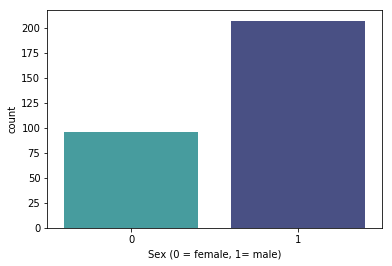

In [8]:
sns.countplot(x='sex', data=dat, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [9]:
countFemale = len(dat[dat.sex == 0])
countMale = len(dat[dat.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(dat.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(dat.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


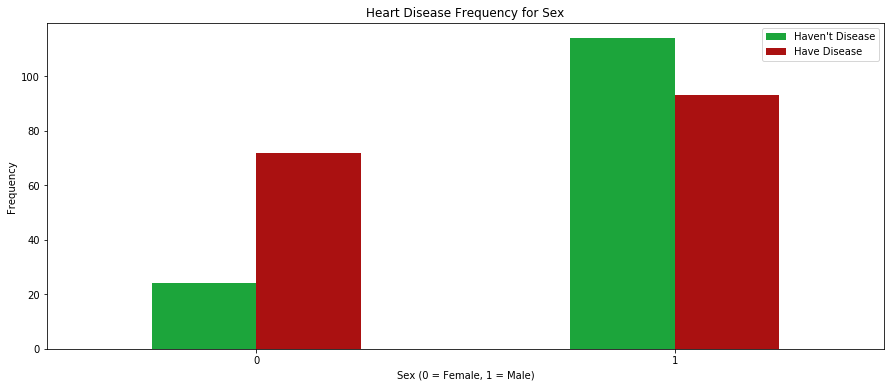

In [10]:
pd.crosstab(dat.sex,dat.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#### Age Analysis

In [11]:
#firstly find min and max ages
minAge=min(dat.age)
maxAge=max(dat.age)
meanAge=dat.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [12]:
young_ages=dat[(dat.age>=29)&(dat.age<40)]
middle_ages=dat[(dat.age>=40)&(dat.age<55)]
elderly_ages=dat[(dat.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


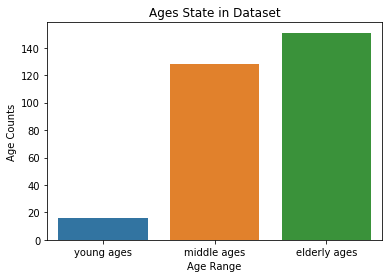

In [13]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

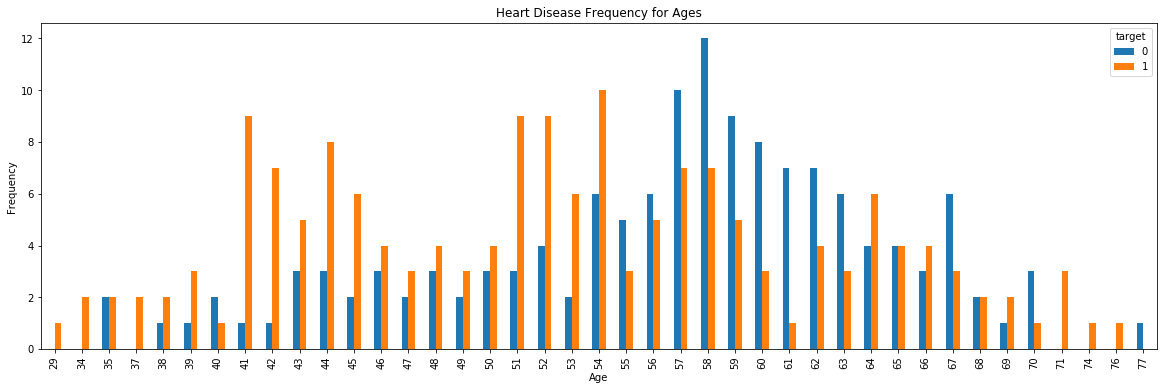

In [14]:
pd.crosstab(dat.age,dat.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#### Chest Pain Type

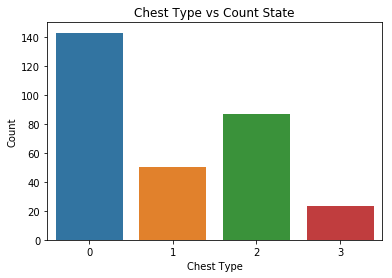

In [15]:
sns.countplot(dat.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

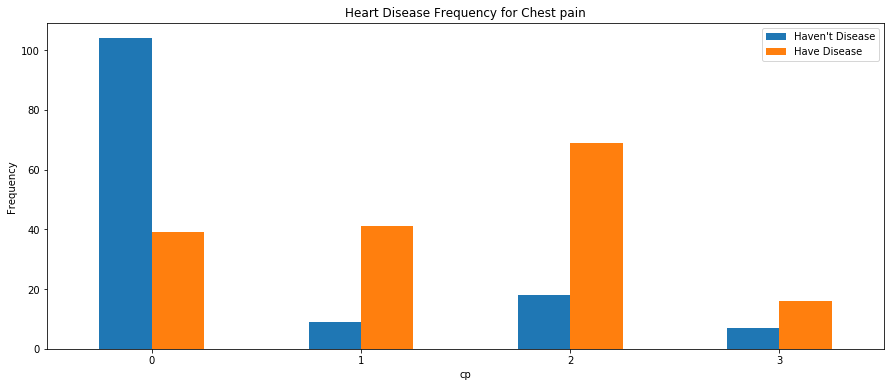

In [16]:
pd.crosstab(dat.cp,dat.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Chest pain')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#### Thalach Analysis

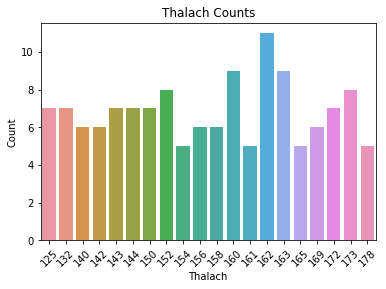

In [17]:
sns.barplot(x=dat.thalach.value_counts()[:20].index,y=dat.thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In [18]:
age_unique=sorted(dat.age.unique())
age_thalach_values=dat.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(dat[dat['age']==age].thalach)/age_thalach_values[i])

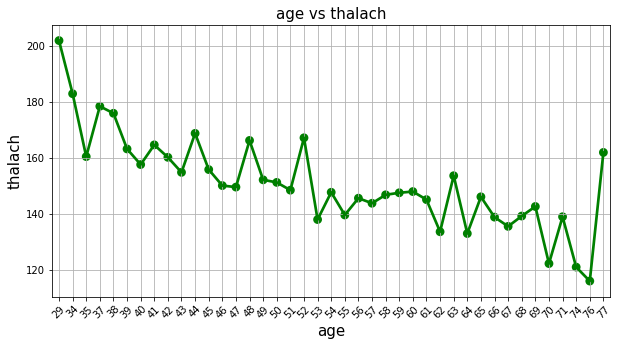

In [19]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='green',alpha=0.8)
plt.xlabel('age',fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('thalach',fontsize = 15)
plt.title('age vs thalach',fontsize = 15)
plt.grid()
plt.show()

#### Thal Analysis

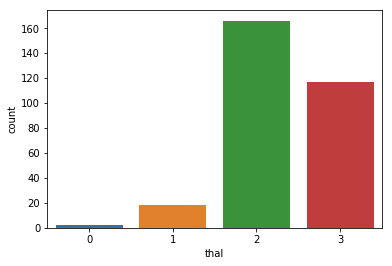

In [20]:
sns.countplot(dat.thal)
plt.show()

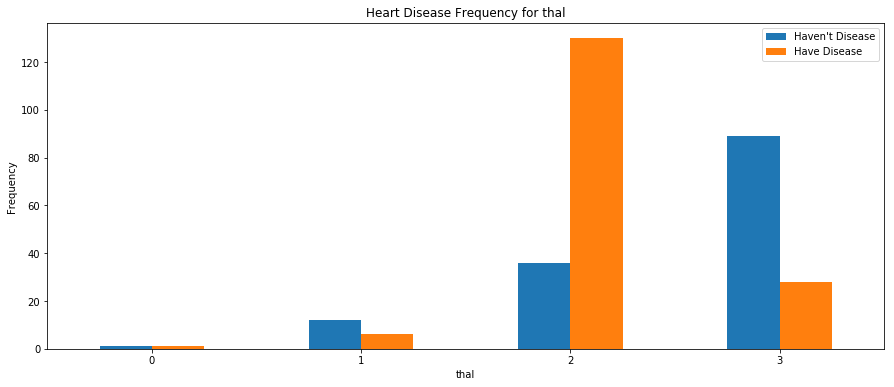

In [21]:
pd.crosstab(dat.thal,dat.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#### Target Analysis

In [22]:
y = dat['target']
X = dat.drop(['target'],axis=1)
X = pd.get_dummies(X,drop_first=True)
X, X_test, y, y_test = model_selection.train_test_split(X,y,test_size = .20)

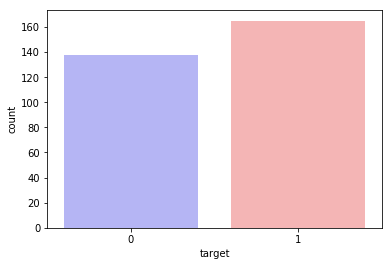

In [23]:
sns.countplot(x="target", data=dat, palette="bwr")
plt.show()

In [24]:
countNoDisease = len(dat[dat.target == 0])
countHaveDisease = len(dat[dat.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(dat.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(dat.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [25]:
dat_filter_mean=dat[(dat['target']==1)&(dat['age']>50)].groupby('sex')[['trestbps','chol','thalach']].mean()
dat_filter_mean.unstack()

          sex
trestbps  0      132.804348
          1      132.396226
chol      0      274.500000
          1      230.132075
thalach   0      149.217391
          1      154.566038
dtype: float64

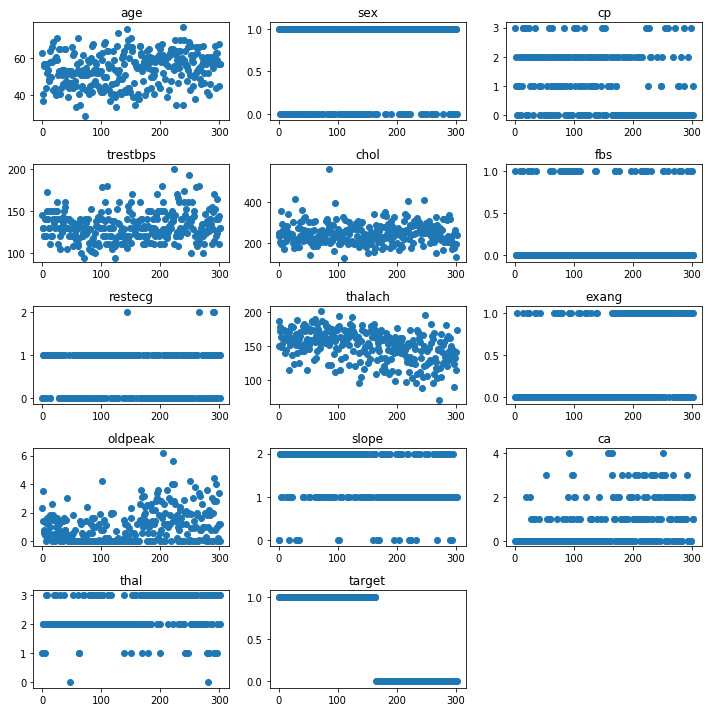

In [26]:
for i,col in enumerate(dat.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],dat[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

## Standarization

In [27]:
# Standarize
stand = preprocessing.StandardScaler()
stand.fit(X)
X = stand.transform(X)
X_test = stand.transform(X_test)

C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pichu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\pichu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## Logistic Regression

In [28]:
parameters=[
{
    'penalty':['l1','l2'],
    'random_state':[3]
    },
]
log=GridSearchCV(LogisticRegression(),parameters,cv=5, scoring='f1')
log.fit(X, y)
log_pred = log.predict(X_test)
log.best_params_

C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

{'penalty': 'l2', 'random_state': 3}

In [29]:
cm = confusion_matrix(y_test,log_pred)
print(cm)
print(classification_report(y_test,log_pred))
print(accuracy_score(y_test,log_pred))

[[23  4]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        34

   micro avg       0.92      0.92      0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61

0.9180327868852459


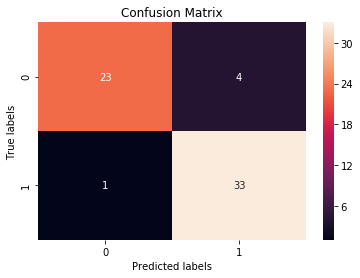

In [30]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

plt.savefig('logistic.png')

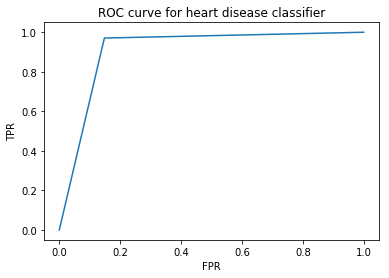

In [31]:
fpr, tpr, threshs = metrics.roc_curve(y_test,log_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for heart disease classifier')
plt.savefig('logistic roc.png')

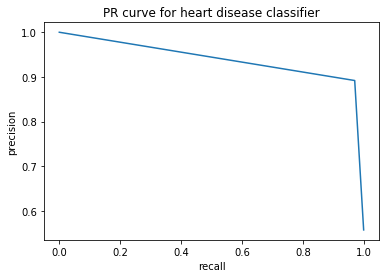

In [32]:
prec, rec, threshs = metrics.precision_recall_curve(y_test,log_pred)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for heart disease classifier")
plt.savefig('logistic pr.png')

In [33]:
f1_score(y_test, log_pred), metrics.auc(fpr, tpr)

(0.9295774647887325, 0.9112200435729848)

## KNN

In [34]:
parameters=[
{
    'n_neighbors':np.arange(1,60)
    },
]

knn=GridSearchCV(KNeighborsClassifier(),parameters,cv=5, scoring='f1')
knn.fit(X, y)
y_pred = knn.predict(X_test)
knn.best_params_

C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 43}

In [35]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[21  6]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934


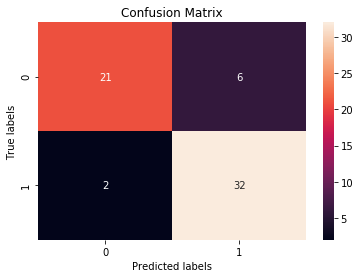

In [36]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

plt.savefig('knn.png')

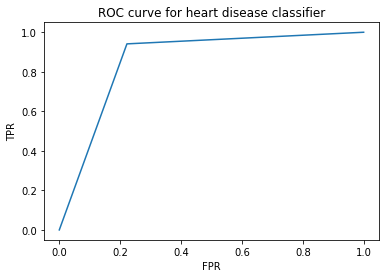

In [37]:
fpr, tpr, threshs = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for heart disease classifier')
plt.savefig('knn roc.png')

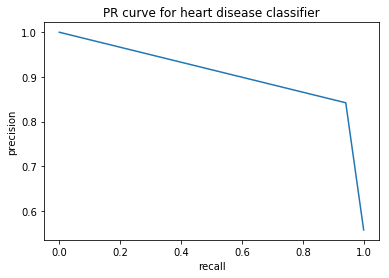

In [38]:
prec, rec, threshs = metrics.precision_recall_curve(y_test,y_pred)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for heart disease classifier")
plt.savefig('knn pr.png')

In [39]:
f1_score(y_test, y_pred), metrics.auc(fpr, tpr)

(0.8888888888888888, 0.8594771241830065)

## Support Vector Machine (SVM) Algorithm

In [40]:
parameters = [
{
    'random_state': [42],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['auto']
    },
]

svm = GridSearchCV(SVC(), parameters, cv=5, scoring='f1')
svm.fit(X,y)
y_pred=svm.predict(X_test)
svm.best_params_

C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 'auto', 'kernel': 'linear', 'random_state': 42}

In [41]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[22  5]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.87      0.97      0.92        34

   micro avg       0.90      0.90      0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

0.9016393442622951


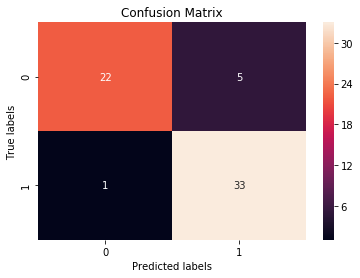

In [42]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

plt.savefig('svm.png')

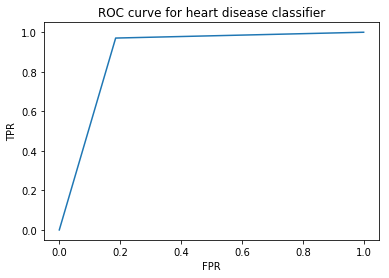

In [43]:
fpr, tpr, threshs = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for heart disease classifier')
plt.savefig('svm roc.png')

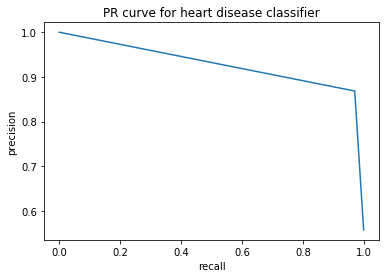

In [44]:
prec, rec, threshs = metrics.precision_recall_curve(y_test,y_pred)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for heart disease classifier")
plt.savefig('svm pr.png')

In [45]:
f1_score(y_test, y_pred), metrics.auc(fpr, tpr)

(0.9166666666666667, 0.8927015250544663)

## Random Forest

In [46]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(1, 20)
    },
]

tree=GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring='f1')
tree.fit(X, y)
y_pred = tree.predict(X_test)
tree.best_params_

C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 18, 'random_state': 3}

In [47]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[23  4]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

0.8852459016393442


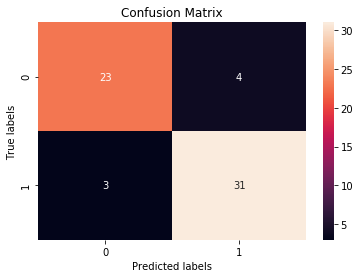

In [48]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

plt.savefig('rf.png')

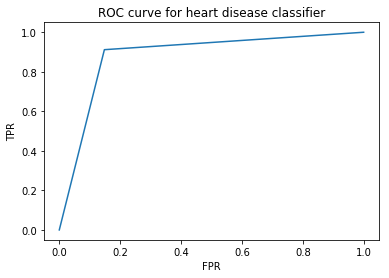

In [49]:
fpr, tpr, threshs = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for heart disease classifier')
plt.savefig('rf roc.png')

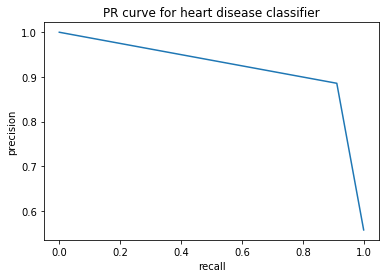

In [50]:
prec, rec, threshs = metrics.precision_recall_curve(y_test,y_pred)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for heart disease classifier")
plt.savefig('rf pr.png')

In [51]:
f1_score(y_test, y_pred), metrics.auc(fpr, tpr)

(0.8985507246376812, 0.8818082788671023)

## Gradient Tree Boosting

In [52]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(1, 20)
    },
]

gt=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5, scoring='f1')
gt.fit(X, y)
y_pred = gt.predict(X_test)
gt.best_params_

C:\Users\pichu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 19, 'random_state': 3}

In [53]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[18  9]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.76      0.85      0.81        34

   micro avg       0.77      0.77      0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61

0.7704918032786885


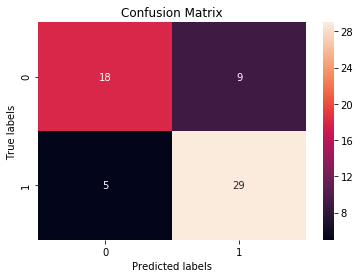

In [54]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

plt.savefig('gt.png')

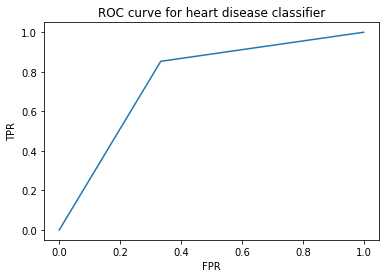

In [55]:
fpr, tpr, threshs = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for heart disease classifier')
plt.savefig('gt roc.png')

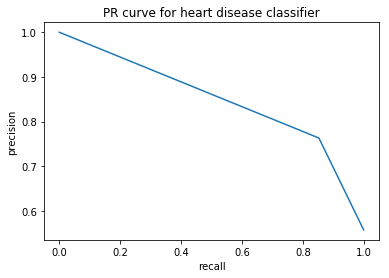

In [56]:
prec, rec, threshs = metrics.precision_recall_curve(y_test,y_pred)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for heart disease classifier")
plt.savefig('gt pr.png')

In [57]:
f1_score(y_test, y_pred), metrics.auc(fpr, tpr)

(0.8055555555555555, 0.7598039215686276)